In [1]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/static/public/2/data.csv"

df = pd.read_csv(url)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
# check duplicates
df.duplicated().sum()

29

In [5]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(48813, 15)

In [6]:
# check null rows
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [7]:
# check catogorical variables
df['occupation'].value_counts()

Prof-specialty       6167
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-cleaners    2071
?                    1843
Farming-fishing      1487
Tech-support         1445
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
# replace ? in data set to null
import numpy as np
df.replace('?', np.nan, inplace = True)

In [ ]:
# check null again
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
income               0
dtype: int64

In [8]:
# set null values to their model values
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
# check shape
df.shape

(48813, 15)

In [10]:
# check for outliers
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48813.000000,4.881300e+04,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,1.896679e+05,10.078688,1079.708705,87.554299,40.425051
std,13.709005,1.056062e+05,2.570257,7454.185982,403.118605,12.390954
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Univariate Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# check target  column
print(df['income'].value_counts())

<=50K     24698
<=50K.    12430
>50K       7839
>50K.      3846
Name: income, dtype: int64


In [12]:
# replace misspled words
df["income"].replace('<=50K.', "<=50K", inplace = True)
df["income"].replace('>50K.', ">50K", inplace = True)

In [13]:
# print value counts
print(df['income'].value_counts())

<=50K    37128
>50K     11685
Name: income, dtype: int64


<Axes: ylabel='income'>

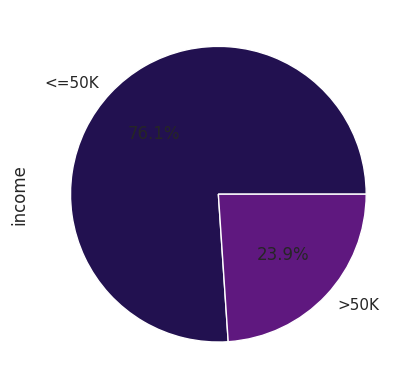

In [22]:
# plot
df['income'].value_counts().plot.pie(autopct= '%1.1f%%')

# Numerical columns

Text(0, 0.5, 'count')

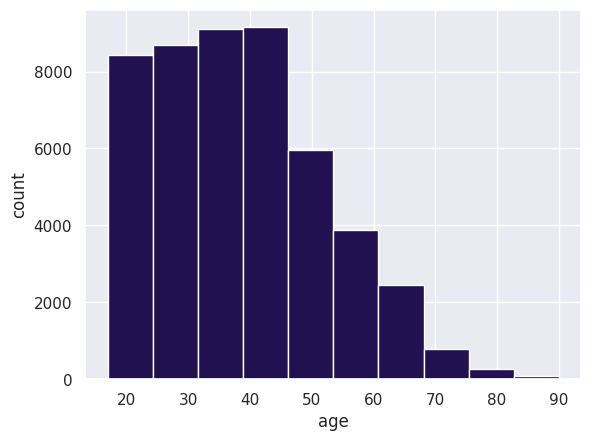

In [23]:
df['age'].hist()
sns.set_theme(style="darkgrid")
sns.set_palette("magma")
plt.xlabel('age')
plt.ylabel('count')

Text(0, 0.5, 'count')

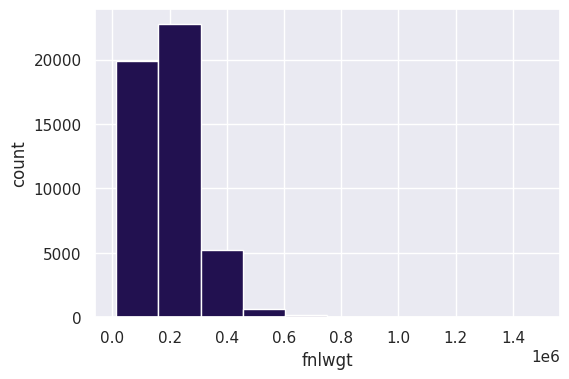

In [24]:
df['fnlwgt'].hist(figsize=(6,4))
plt.xlabel('fnlwgt')
plt.ylabel('count')

Text(0, 0.5, 'count')

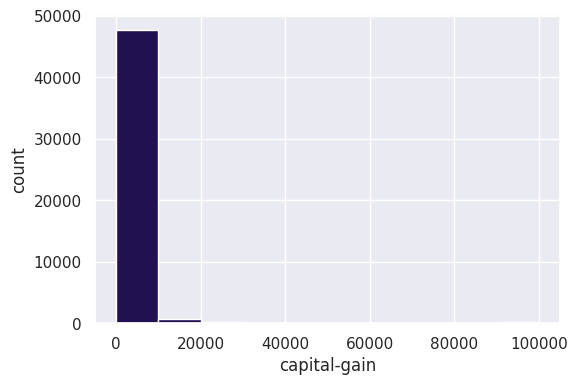

In [25]:
df['capital-gain'].hist(figsize=(6,4))
plt.xlabel('capital-gain')
plt.ylabel('count')

Text(0, 0.5, 'count')

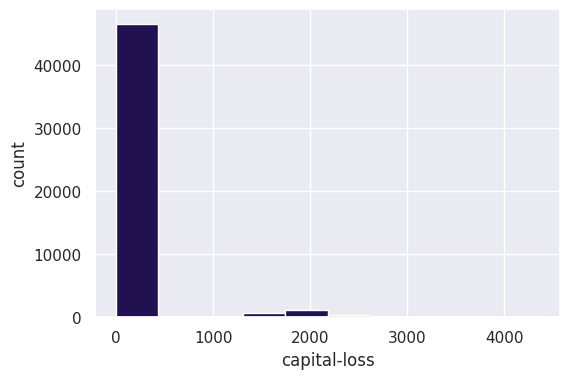

In [26]:
df['capital-loss'].hist(figsize=(6,4))
plt.xlabel('capital-loss')
plt.ylabel('count')

Text(0, 0.5, 'count')

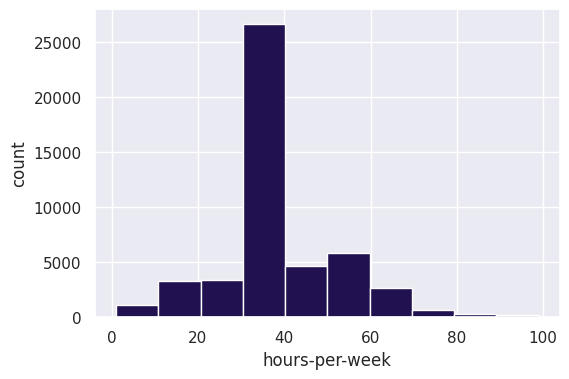

In [27]:
df['hours-per-week'].hist(figsize=(6,4))
plt.xlabel('hours-per-week')
plt.ylabel('count')

Text(0, 0.5, 'count')

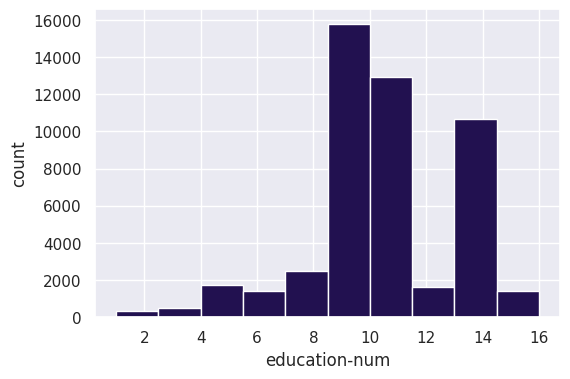

In [28]:
df['education-num'].hist(figsize=(6,4))
plt.xlabel('education-num')
plt.ylabel('count')

In [29]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Catogorical

Text(0.5, 1.0, 'Workclass Distribution')

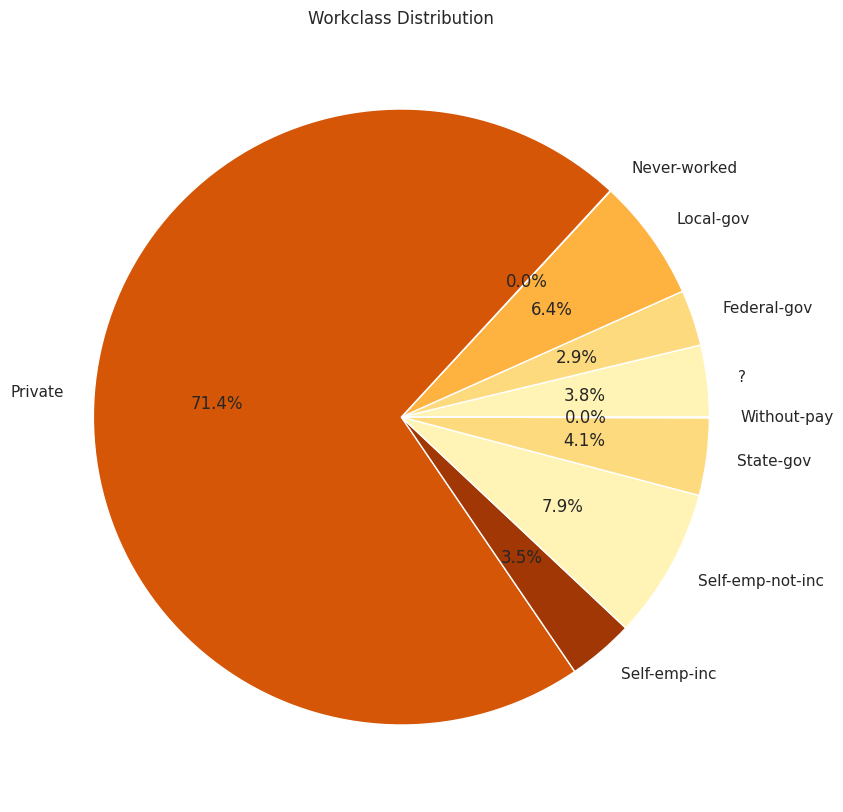

In [30]:
# Workclass

sns.set_palette("YlOrBr")
plt.figure(figsize=(16, 10))
plt.pie(df.groupby('workclass').size(), labels=df.groupby('workclass').size().index, autopct='%1.1f%%')
plt.title('Workclass Distribution')

Text(0.5, 1.0, 'Education Distribution')

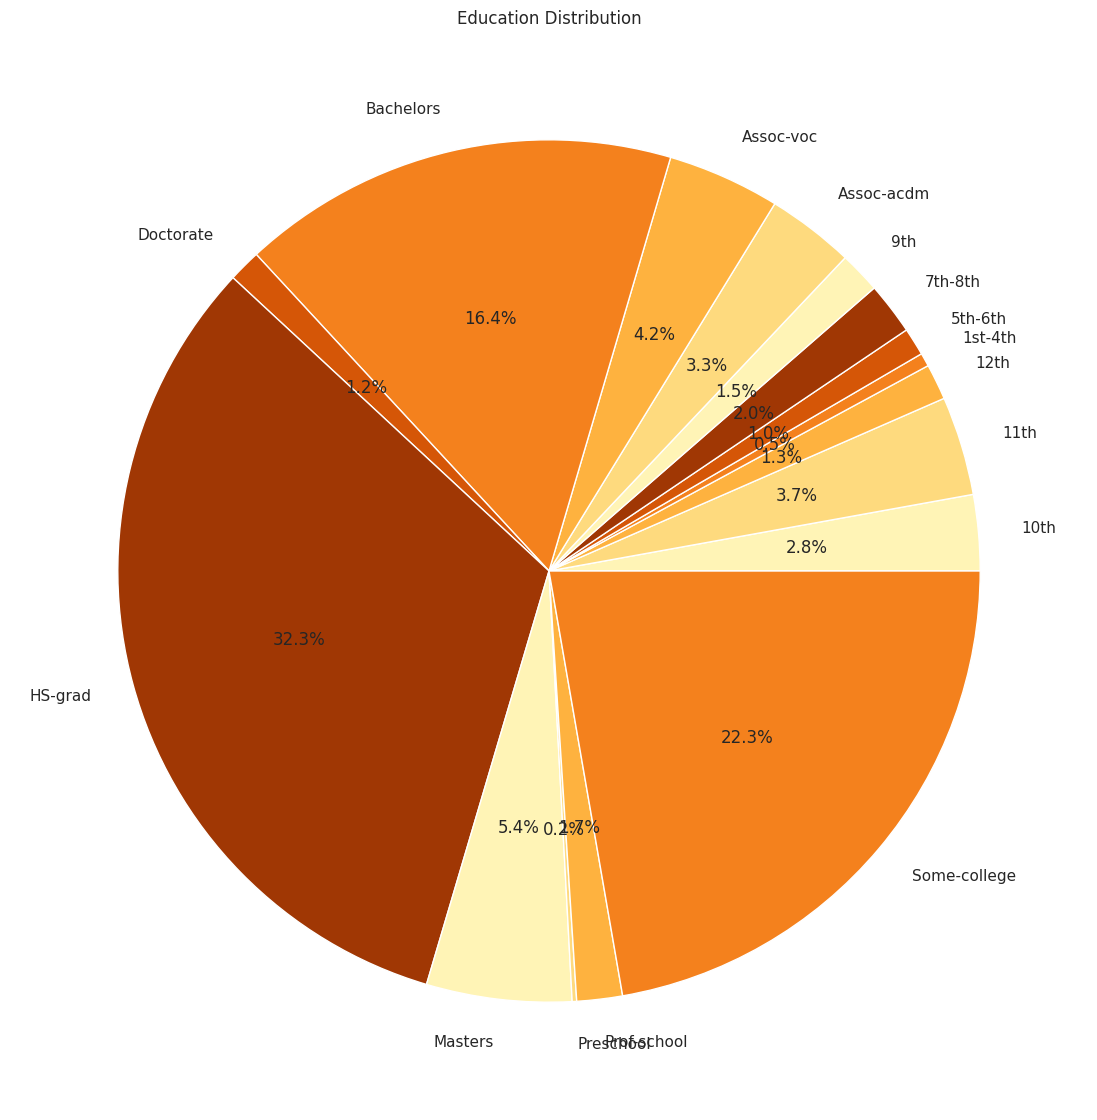

In [31]:
plt.figure(figsize=(19, 14))
plt.pie(df.groupby('education').size(), labels=df.groupby('education').size().index, autopct='%1.1f%%')
plt.title('Education Distribution')

Text(0.5, 1.0, 'Marital-status Distribution')

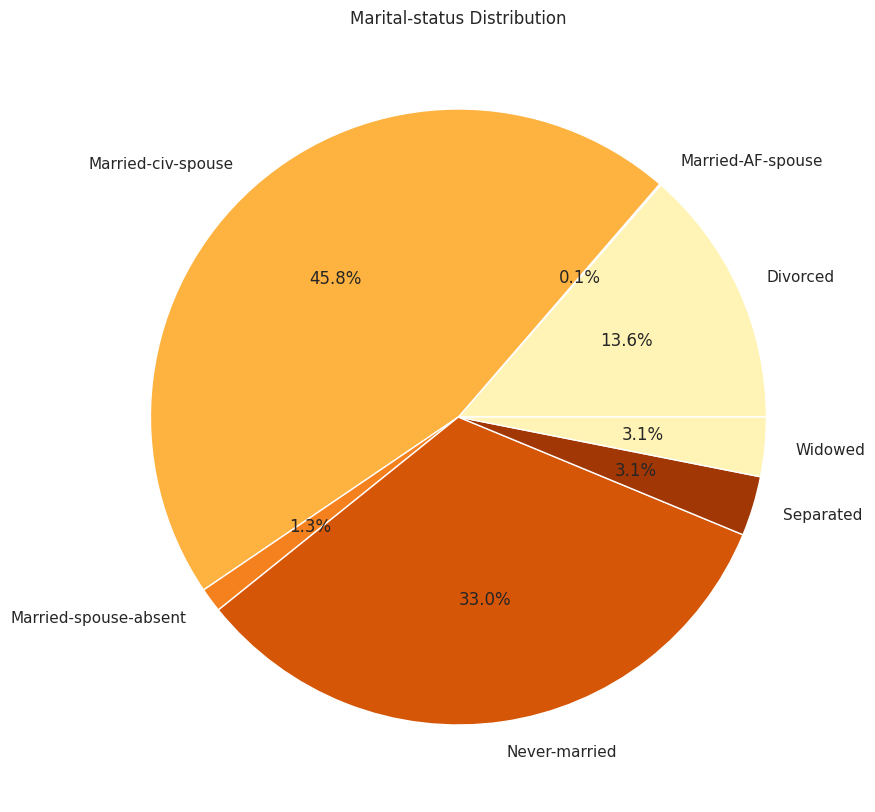

In [32]:
plt.figure(figsize=(16, 10))
plt.pie(df.groupby('marital-status').size(), labels=df.groupby('marital-status').size().index, autopct='%1.1f%%')
plt.title('Marital-status Distribution')

Text(0.5, 1.0, 'Occupation Distribution')

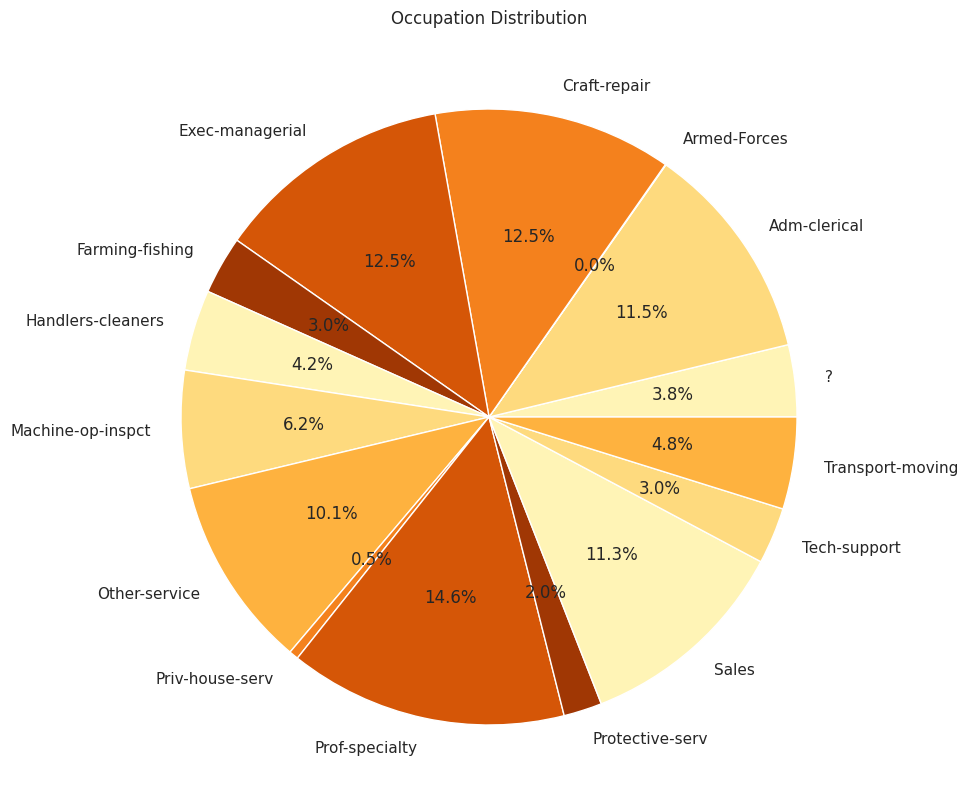

In [33]:
plt.figure(figsize=(16, 10))
plt.pie(df.groupby('occupation').size(), labels=df.groupby('occupation').size().index, autopct='%1.1f%%')
plt.title('Occupation Distribution')

Text(0.5, 1.0, 'Relationship Distribution')

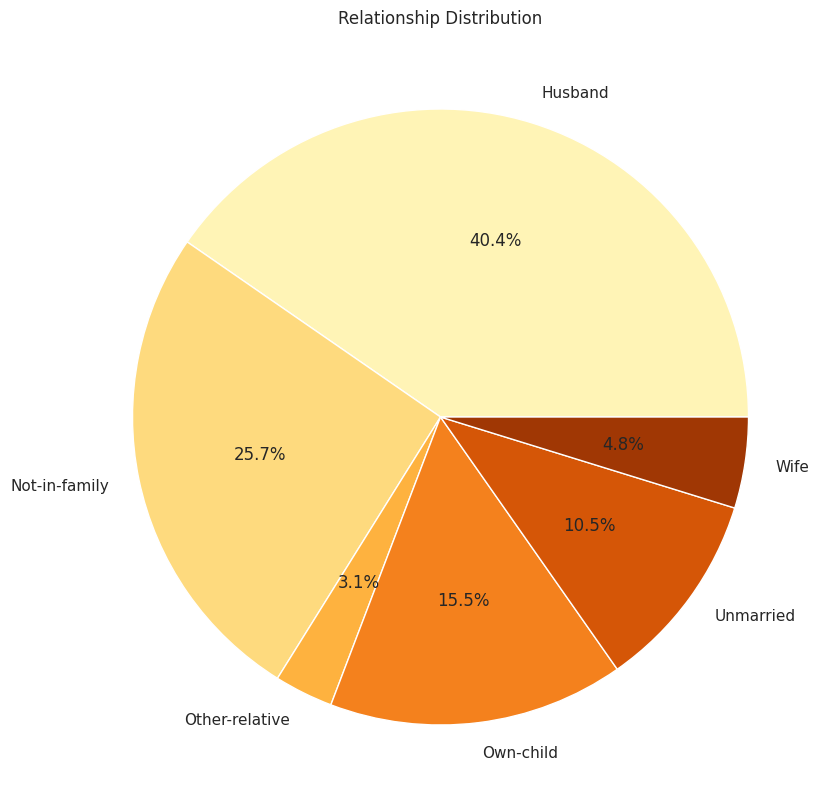

In [34]:
plt.figure(figsize=(16, 10))
plt.pie(df.groupby('relationship').size(), labels=df.groupby('relationship').size().index, autopct='%1.1f%%')
plt.title('Relationship Distribution')

Text(0.5, 1.0, 'Relationship Distribution')

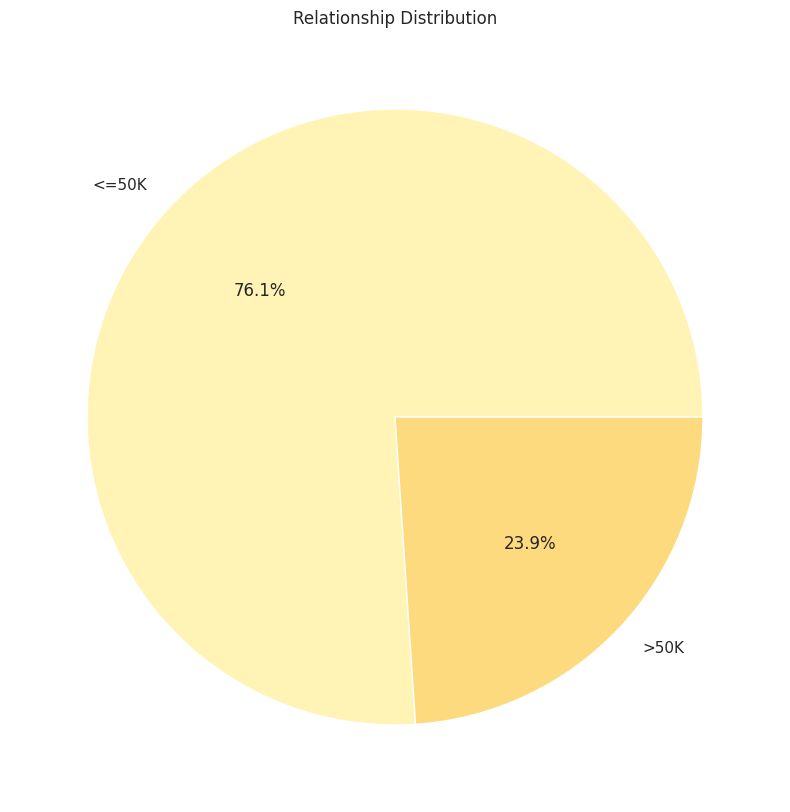

In [35]:
plt.figure(figsize=(16, 10))
plt.pie(df.groupby('income').size(), labels=df.groupby('income').size().index, autopct='%1.1f%%')
plt.title('Relationship Distribution')

([<matplotlib.patches.Wedge at 0x7b70d7821270>,
 [Text(1.0992284099351088, 0.04119347996385269, '?'),
  Text(1.0967645779943527, 0.08430575577544938, 'Cambodia'),
  Text(1.095525002658721, 0.09912097936163429, 'Canada'),
  Text(1.093376109461638, 0.12053498769457856, 'China'),
  Text(1.0916733040332287, 0.13509033000616286, 'Columbia'),
  Text(1.0896220907271943, 0.15074382043486267, 'Cuba'),
  Text(1.087152973158523, 0.1676258123099904, 'Dominican-Republic'),
  Text(1.0855070021776716, 0.17797344808494597, 'Ecuador'),
  Text(1.0831262739412337, 0.19193091126282794, 'El-Salvador'),
  Text(1.0794646371100396, 0.21155636891592472, 'England'),
  Text(1.0771572206958573, 0.22300744808812217, 'France'),
  Text(1.0735224893571882, 0.23989469532348162, 'Germany'),
  Text(1.069441006683955, 0.25747996664363787, 'Greece'),
  Text(1.067163536529528, 0.2667620405938429, 'Guatemala'),
  Text(1.064342129113992, 0.2778053854645273, 'Haiti'),
  Text(1.0629705612804168, 0.28300810209461463, 'Holand-Ne

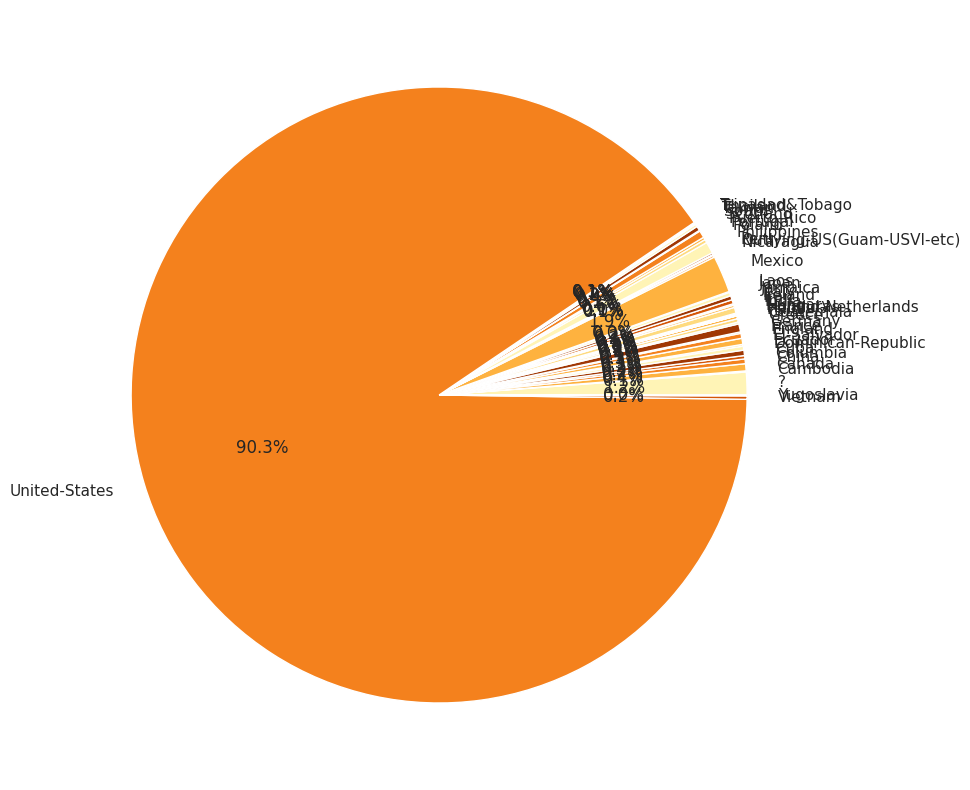

In [36]:
plt.figure(figsize=(18, 10))
plt.pie(df.groupby('native-country').size(), labels=df.groupby('native-country').size().index, autopct='%1.1f%%')

Text(0.5, 1.0, 'Race Distribution')

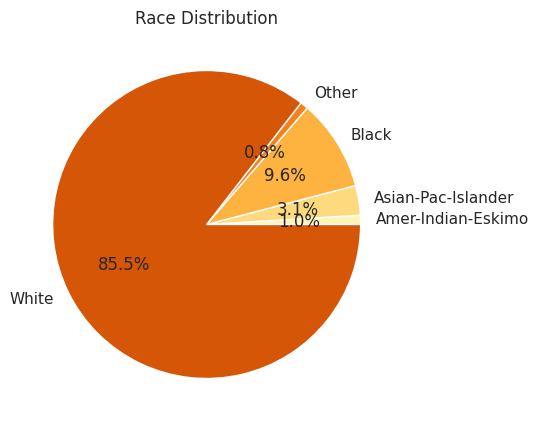

In [37]:
plt.figure(figsize=(12, 5))
plt.pie(df.groupby('race').size(), labels=df.groupby('race').size().index, autopct='%1.1f%%')
plt.title('Race Distribution')

Text(0.5, 1.0, 'Sex Distribution')

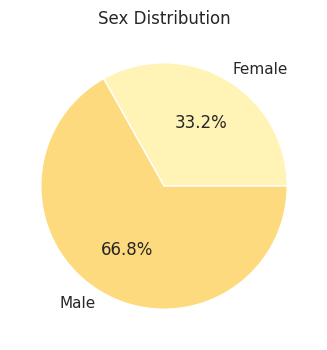

In [38]:
plt.figure(figsize=(8, 4))
plt.pie(df.groupby('sex').size(), labels=df.groupby('sex').size().index, autopct='%1.1f%%')
plt.title('Sex Distribution')

# Bivariate Analysis

In [39]:
df['age'].describe()

count    48813.000000
mean        38.647348
std         13.709005
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

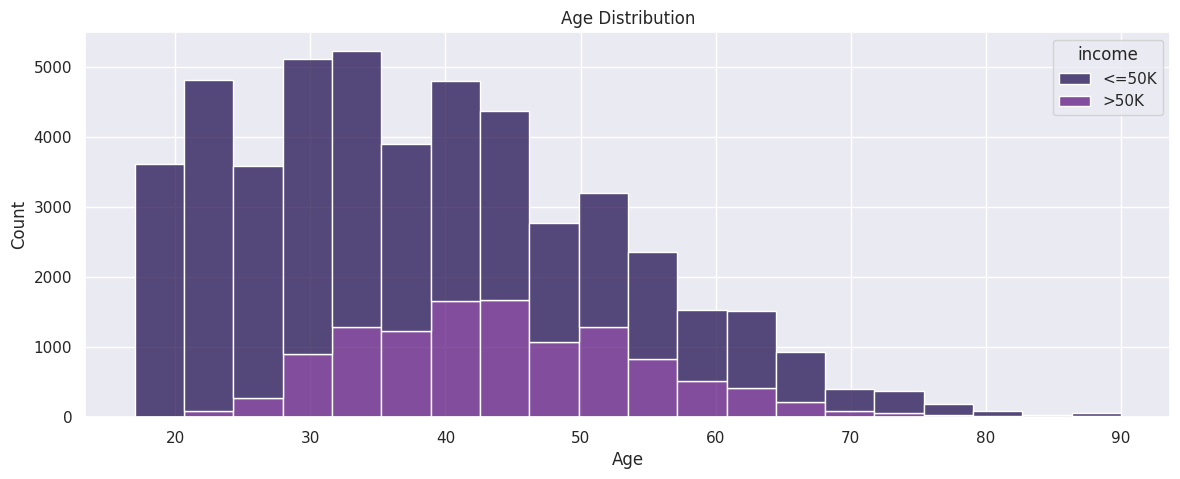

In [40]:
plt.figure(figsize=(14, 5))
sns.set_theme(style="darkgrid")
sns.set_palette("magma")
sns.histplot(data=df, x='age', hue='income', bins=20, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [41]:
df.groupby('workclass').size()

workclass
?                    1836
Federal-gov          1432
Local-gov            3136
Never-worked           10
Private             34842
Self-emp-inc         1694
Self-emp-not-inc     3861
State-gov            1981
Without-pay            21
dtype: int64

Text(0.5, 1.0, 'Workclass')

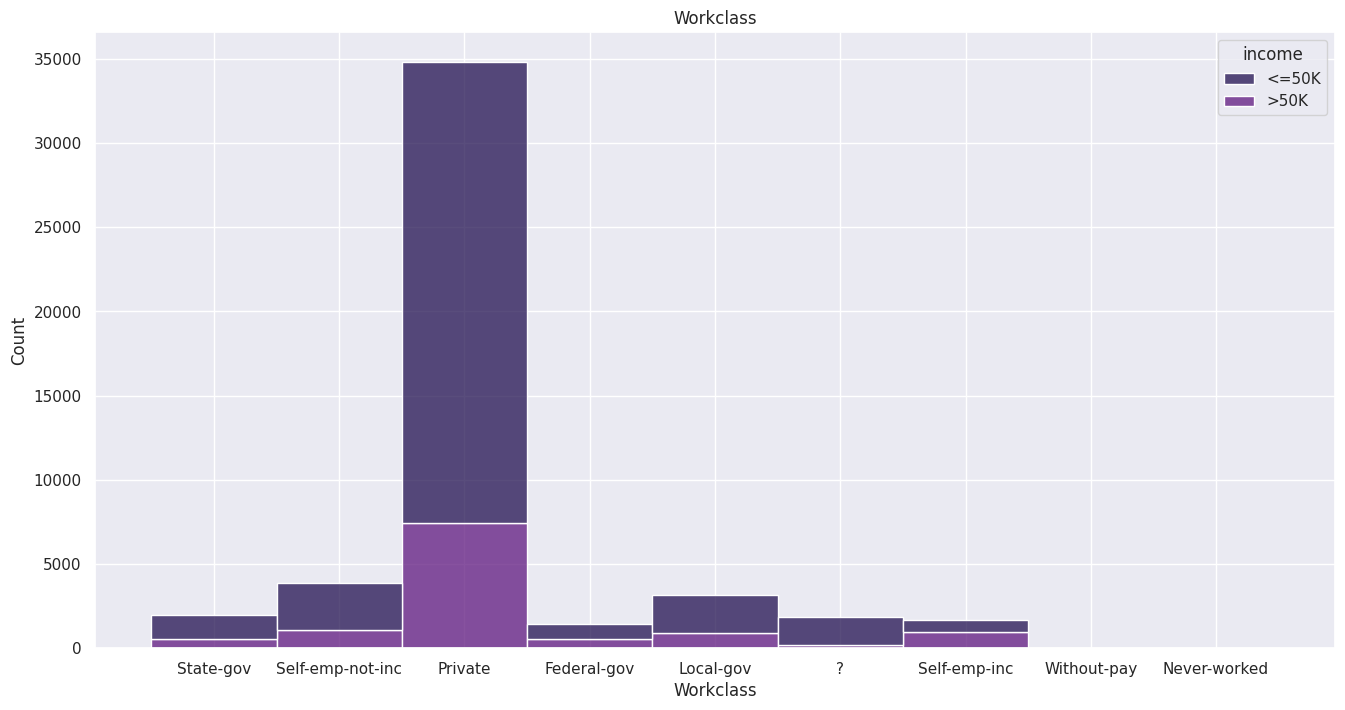

In [42]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='workclass', hue='income', multiple='stack')
plt.xlabel('Workclass')
plt.title('Workclass')

Text(0.5, 0, 'Final Weight')

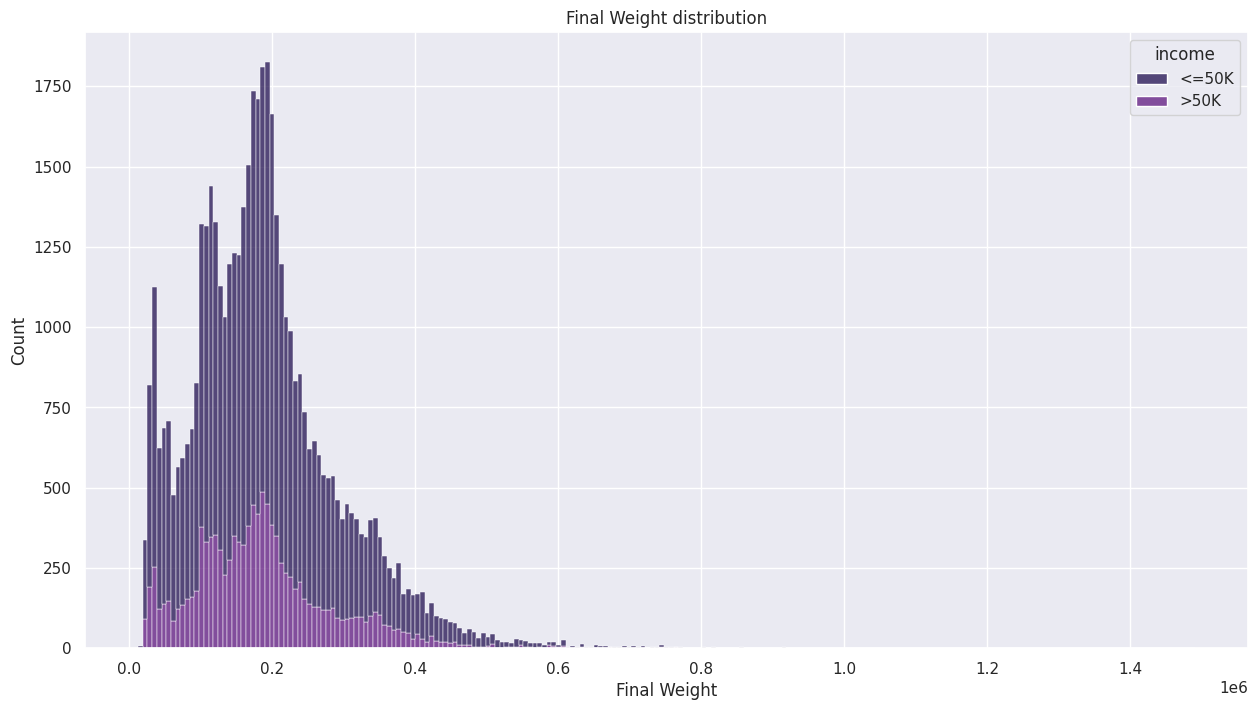

In [43]:
plt.figure(figsize=(15, 8))
sns.histplot(x='fnlwgt', data=df, hue='income', multiple='stack')
plt.title('Final Weight distribution')
plt.xlabel('Final Weight')

In [44]:
df.groupby('education').size()

education
10th             1389
11th             1812
12th              656
1st-4th           245
5th-6th           508
7th-8th           954
9th               756
Assoc-acdm       1601
Assoc-voc        2060
Bachelors        8020
Doctorate         594
HS-grad         15777
Masters          2656
Preschool          82
Prof-school       834
Some-college    10869
dtype: int64

In [45]:
df.groupby('education-num').size()

education-num
1        82
2       245
3       508
4       954
5       756
6      1389
7      1812
8       656
9     15777
10    10869
11     2060
12     1601
13     8020
14     2656
15      834
16      594
dtype: int64

<Axes: xlabel='education', ylabel='count'>

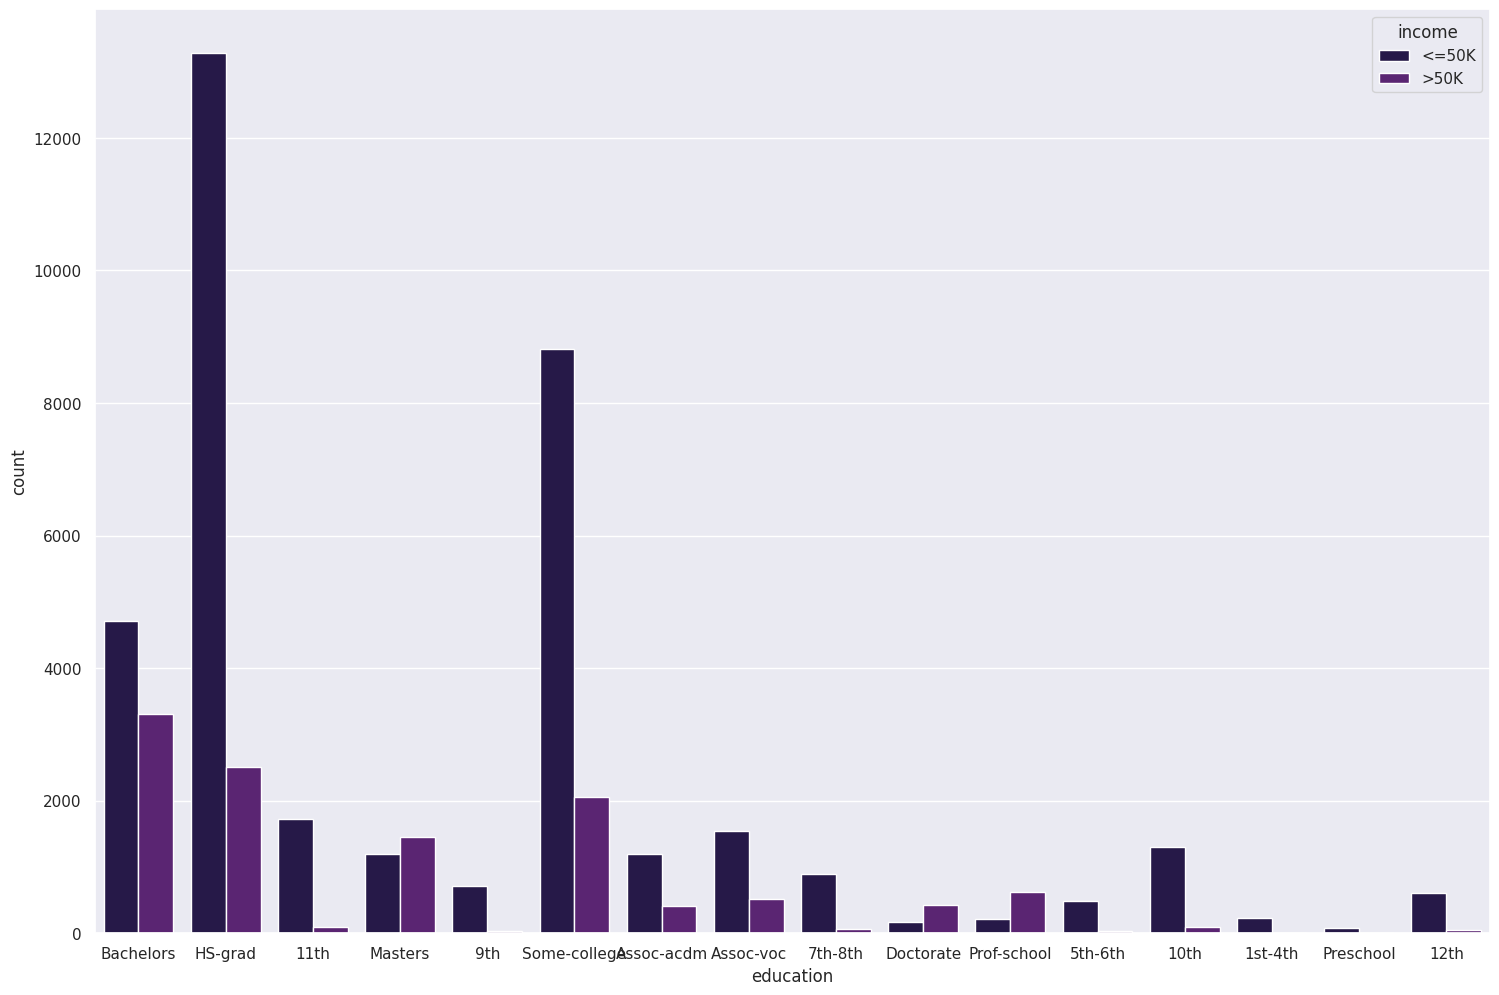

In [46]:
plt.figure(figsize=(18, 12))
sns.countplot(x='education', data=df, hue='income')

<Axes: xlabel='education-num', ylabel='count'>

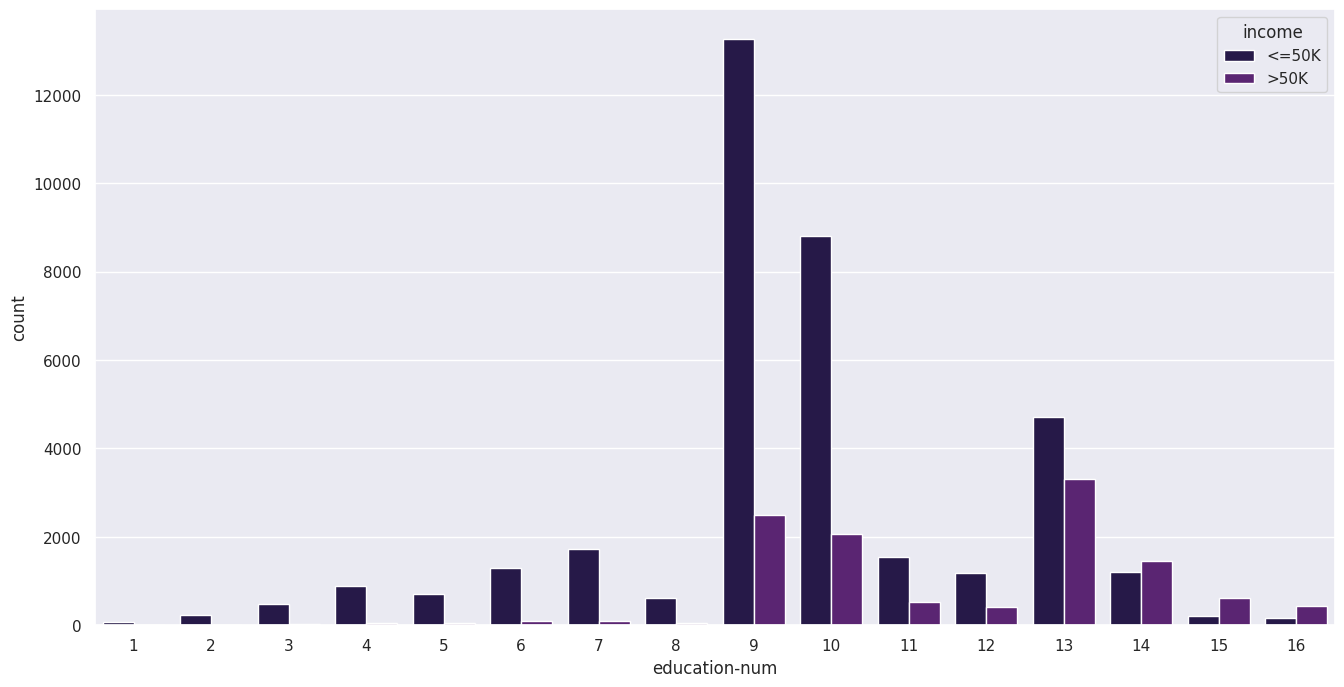

In [47]:
plt.figure(figsize=(16, 8))
sns.countplot(x='education-num', data=df, hue='income')

In [48]:
print(df.groupby('marital-status').size())

marital-status
Divorced                  6630
Married-AF-spouse           37
Married-civ-spouse       22372
Married-spouse-absent      628
Never-married            16098
Separated                 1530
Widowed                   1518
dtype: int64


<Axes: xlabel='marital-status', ylabel='count'>

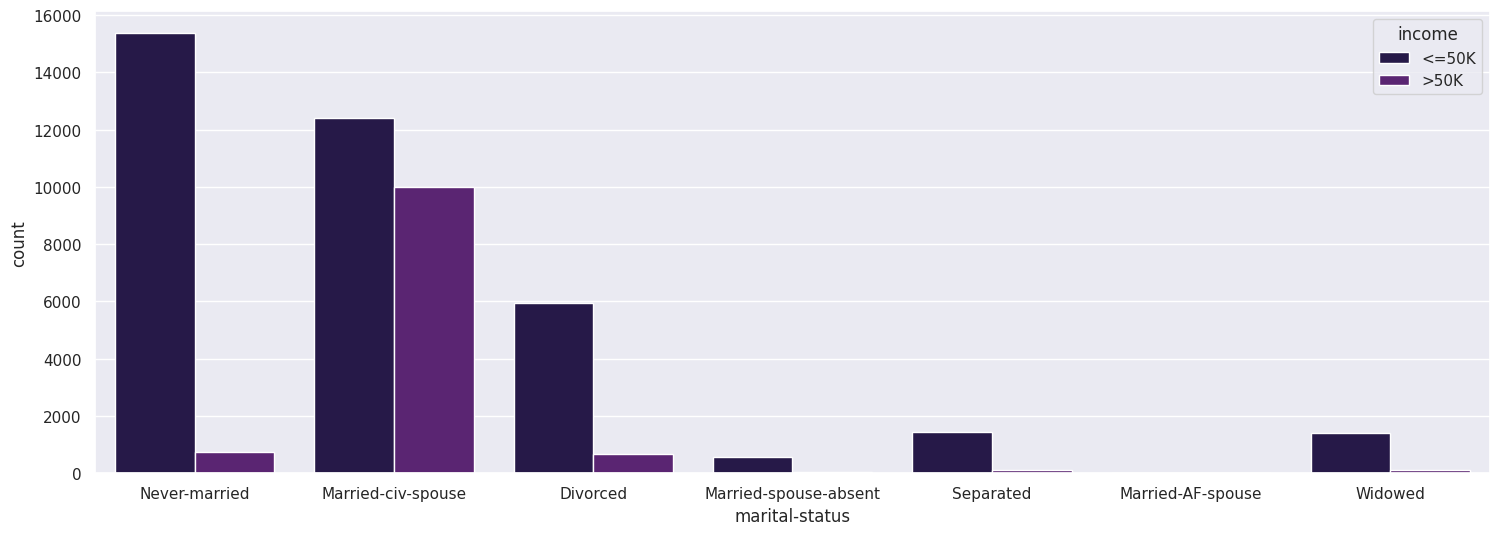

In [49]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='marital-status', hue='income')


In [50]:
print(df.groupby('occupation').size())

occupation
?                    1843
Adm-clerical         5608
Armed-Forces           15
Craft-repair         6107
Exec-managerial      6084
Farming-fishing      1487
Handlers-cleaners    2071
Machine-op-inspct    3019
Other-service        4919
Priv-house-serv       240
Prof-specialty       7133
Protective-serv       983
Sales                5504
Tech-support         1445
Transport-moving     2355
dtype: int64


Text(0.5, 1.0, 'Occupation Distribution')

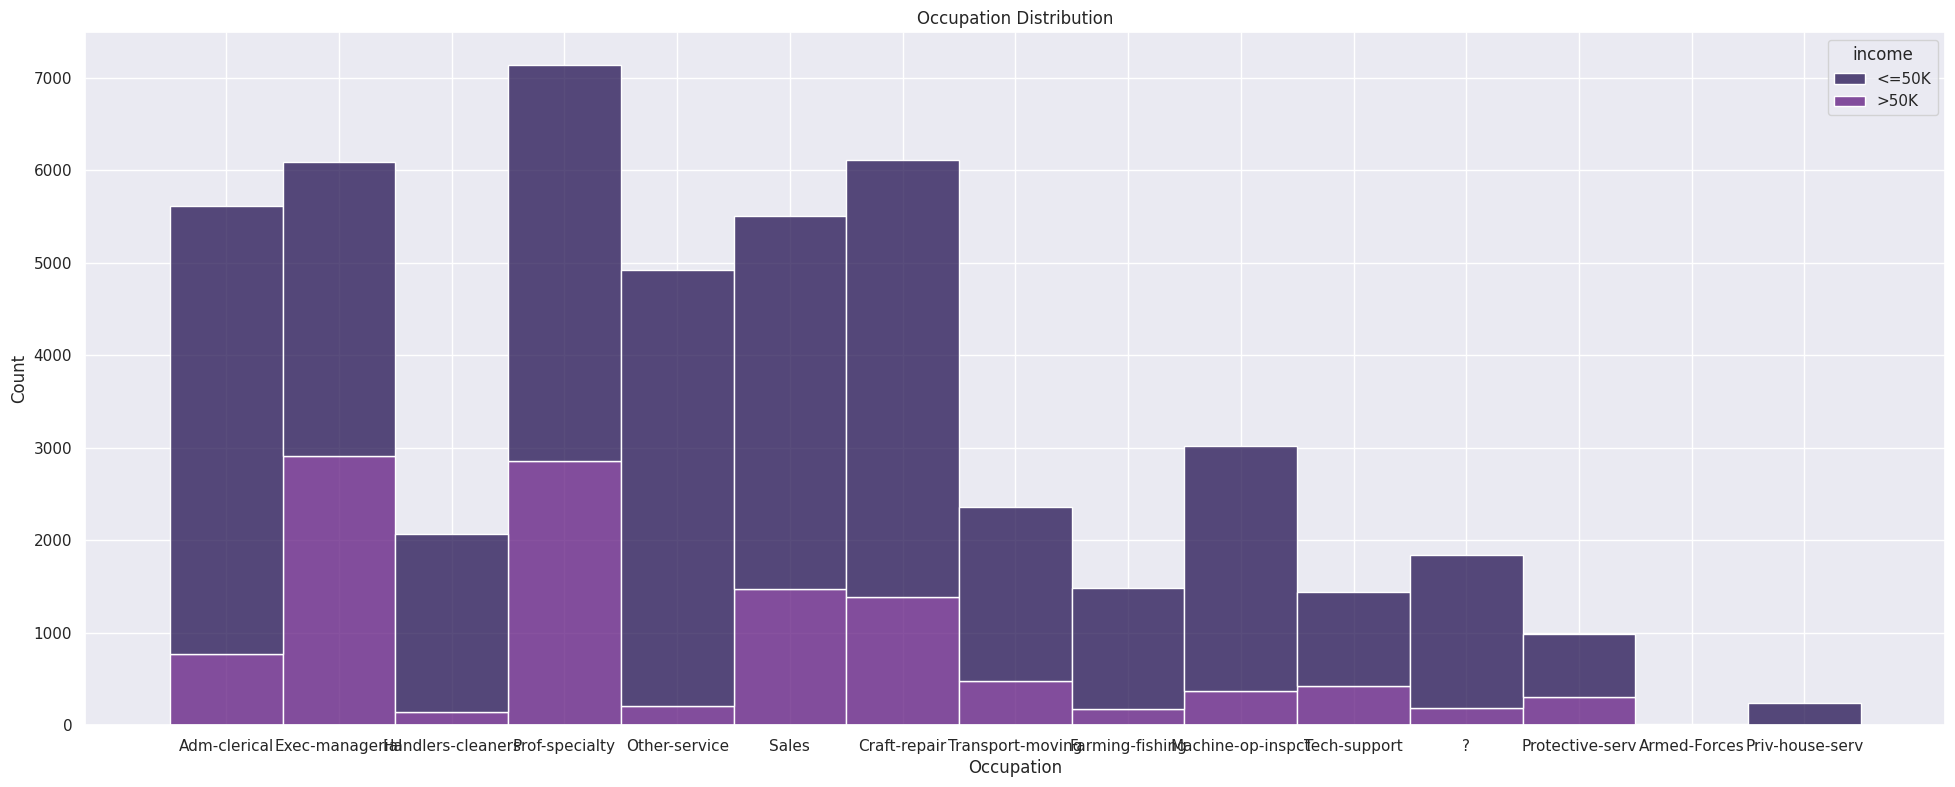

In [51]:
plt.figure(figsize=(24, 9))
sns.histplot(data=df, x='occupation', hue='income', multiple='stack')
plt.xlabel('Occupation')
plt.title('Occupation Distribution')

In [52]:
print(df.groupby('relationship').size())

relationship
Husband           19709
Not-in-family     12567
Other-relative     1506
Own-child          7576
Unmarried          5124
Wife               2331
dtype: int64


<Axes: xlabel='relationship', ylabel='Count'>

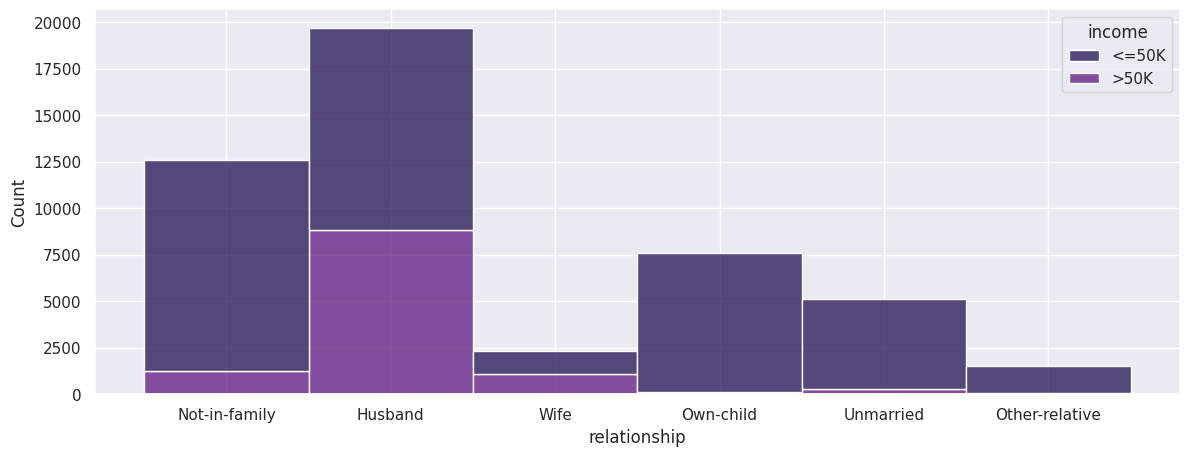

In [53]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x='relationship', hue='income', multiple='stack')

In [54]:
print(df.groupby('race').size())

race
Amer-Indian-Eskimo      470
Asian-Pac-Islander     1518
Black                  4683
Other                   406
White                 41736
dtype: int64


Text(0.5, 1.0, 'Race x Income')

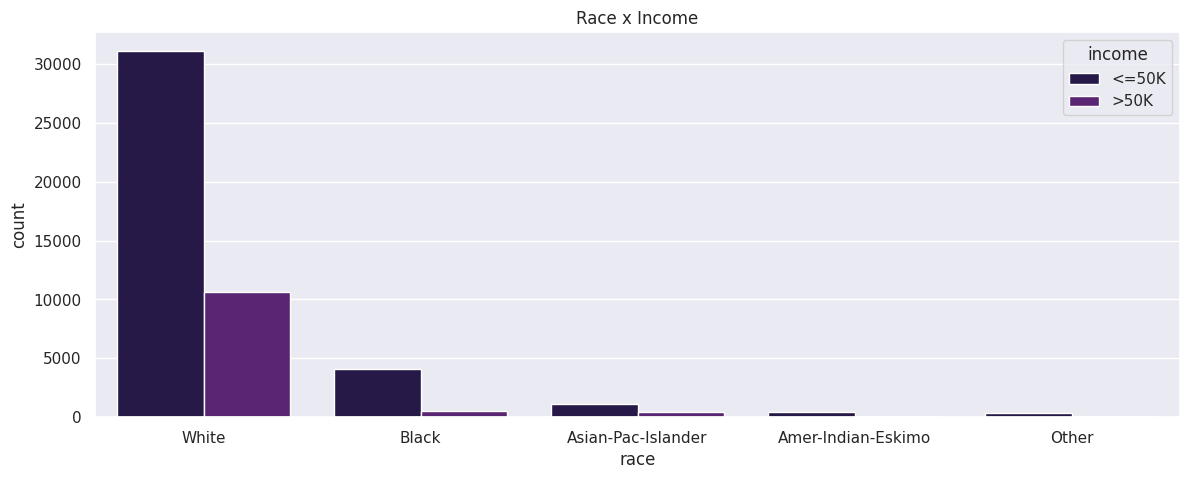

In [55]:
plt.figure(figsize=(14, 5))
sns.countplot(data=df, x='race', hue='income')
plt.title('Race x Income')

In [56]:
print(df.groupby('sex').size())

sex
Female    16182
Male      32631
dtype: int64


Text(0.5, 1.0, 'Sex and Income')

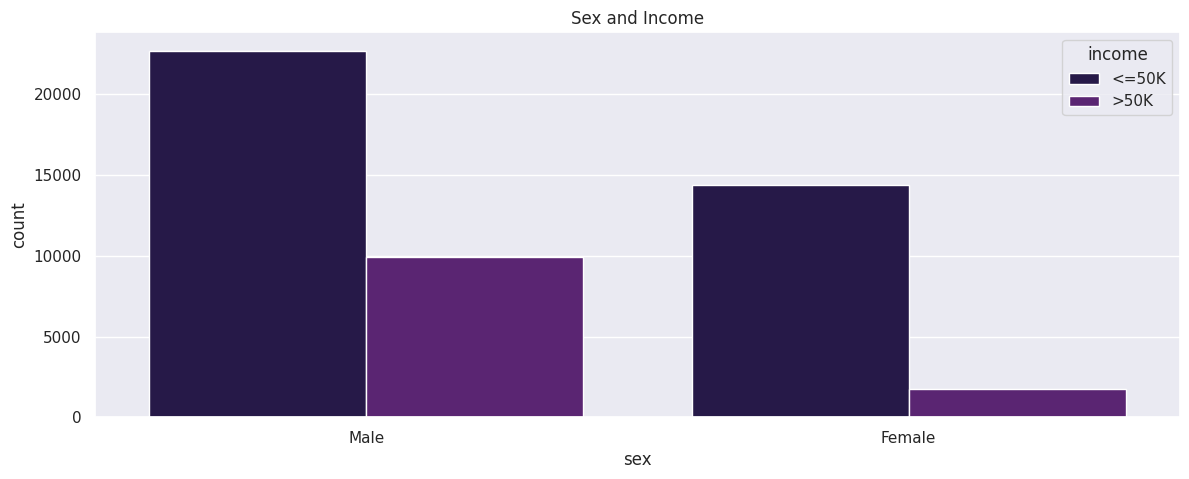

In [57]:
plt.figure(figsize=(14, 5))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Sex and Income')

In [58]:
print(df.groupby('capital-gain').size())

capital-gain
0        44778
114          8
401          5
594         52
914         10
         ...  
25236       14
27828       58
34095        6
41310        3
99999      244
Length: 123, dtype: int64


In [59]:
print(df.groupby('capital-loss').size())

capital-loss
0       46531
155         1
213         5
323         5
419         3
        ...  
3175        2
3683        2
3770        4
3900        2
4356        3
Length: 99, dtype: int64


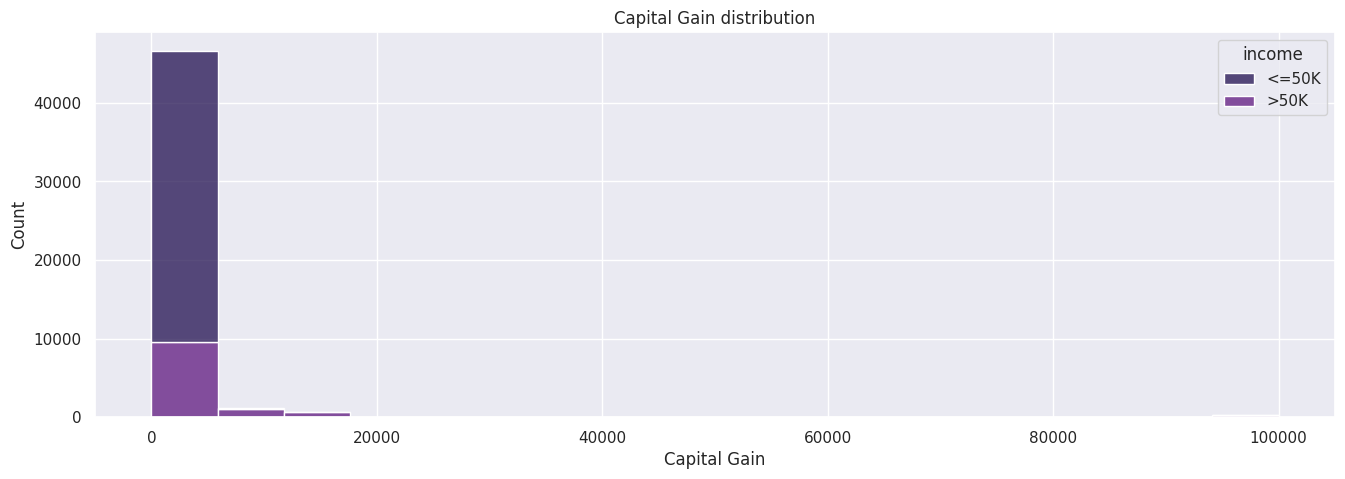

In [60]:
plt.figure(figsize=(16, 5))
sns.histplot(x='capital-gain', data=df, hue='income', multiple='stack')
plt.title('Capital Gain distribution')
plt.xlabel('Capital Gain')
plt.show()

Text(0.5, 0, 'Capital Loss')

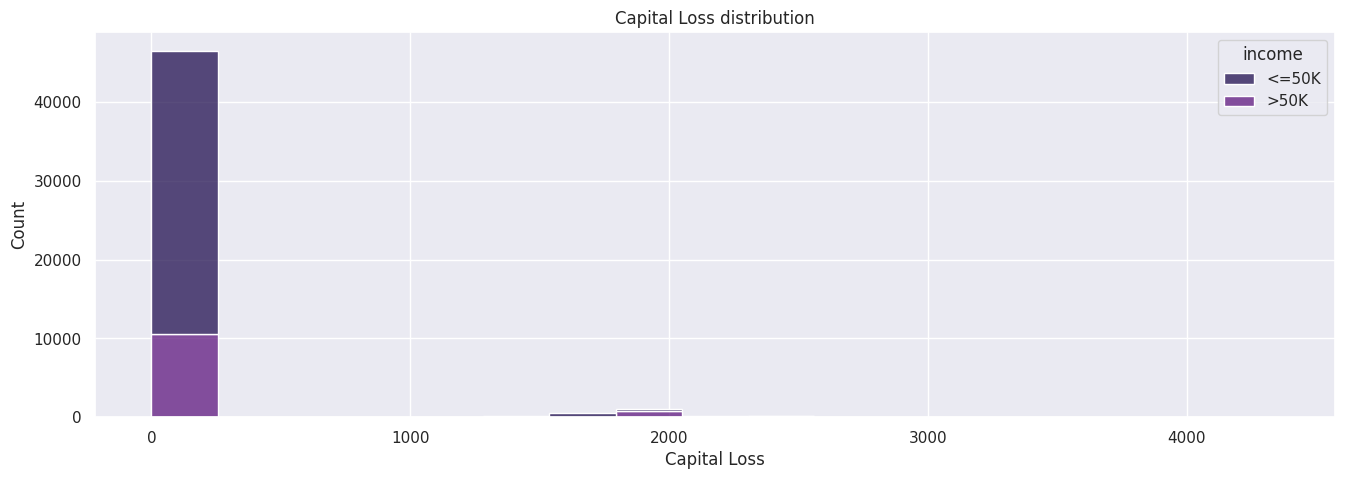

In [61]:
plt.figure(figsize=(16, 5))
sns.histplot(x='capital-loss', data=df, hue='income', multiple='stack')
plt.title('Capital Loss distribution')
plt.xlabel('Capital Loss')

In [62]:
df.groupby('hours-per-week').size()

hours-per-week
1      27
2      53
3      59
4      84
5      95
     ... 
95      2
96      9
97      2
98     14
99    137
Length: 96, dtype: int64

Text(0.5, 0, 'hours-per-week')

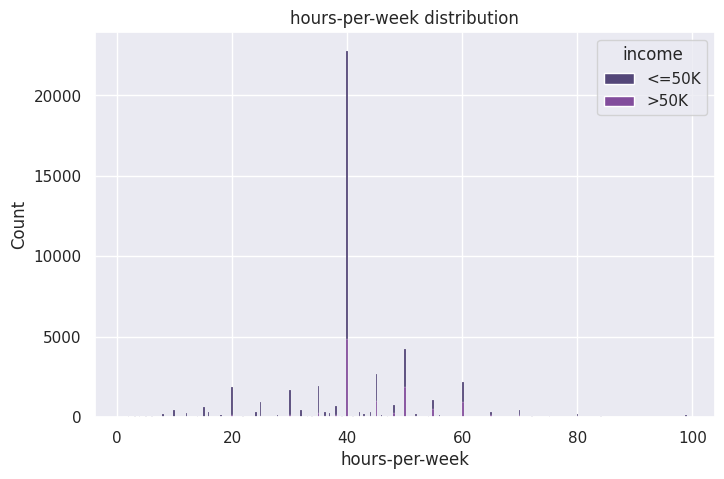

In [63]:
plt.figure(figsize=(8, 5))
sns.histplot(x='hours-per-week', data=df, hue='income', multiple='stack')
plt.title('hours-per-week distribution')
plt.xlabel('hours-per-week')

In [64]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Text(0.5, 0, 'native-country')

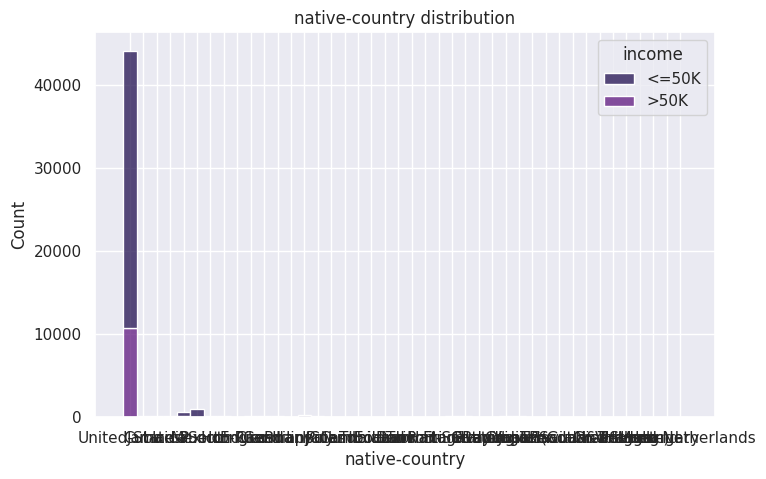

In [65]:
plt.figure(figsize=(8, 5))
sns.histplot(x='native-country', data=df, hue='income', multiple='stack')
plt.title('native-country distribution')
plt.xlabel('native-country')

In [66]:
df.groupby('native-country').size()

native-country
?                               582
Cambodia                         28
Canada                          182
China                           122
Columbia                         85
Cuba                            138
Dominican-Republic              103
Ecuador                          45
El-Salvador                     155
England                         127
France                           38
Germany                         206
Greece                           49
Guatemala                        86
Haiti                            75
Holand-Netherlands                1
Honduras                         20
Hong                             30
Hungary                          19
India                           151
Iran                             59
Ireland                          37
Italy                           105
Jamaica                         106
Japan                            92
Laos                             23
Mexico                          947
Nicaragua    

# Feature Extraction

In [67]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [68]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
# df.drop(['education','capital-gain','capital-loss'], axis = 1, inplace = True)
# df.shape

(48813, 12)

In [69]:
# encode labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,4,215419,9,13,0,10,1,4,0,0,0,36,39,0
48838,64,4,321403,11,9,6,10,2,2,1,0,0,40,39,0
48839,38,4,374983,9,13,2,10,0,4,1,0,0,50,39,0
48840,44,4,83891,9,13,0,1,3,1,1,5455,0,40,39,0


In [70]:
# seperate target variable from features
X = df.drop(['income'], axis=1)

y = df['income']

In [71]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,4,215419,9,13,0,10,1,4,0,0,0,36,39
48838,64,4,321403,11,9,6,10,2,2,1,0,0,40,39
48839,38,4,374983,9,13,2,10,0,4,1,0,0,50,39
48840,44,4,83891,9,13,0,1,3,1,1,5455,0,40,39


In [72]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income, Length: 48813, dtype: int64

In [73]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=43)

In [74]:
print(x_train.shape,'\n')
print(x_test.shape)

(39050, 14) 

(9763, 14)


# Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model building

In [76]:
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

ACCURACY_SCORE 

 0.8003687391170746 

CLASSIFICATION_REPORT 

               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7428
           1       0.67      0.32      0.44      2335

    accuracy                           0.80      9763
   macro avg       0.74      0.64      0.66      9763
weighted avg       0.78      0.80      0.77      9763
 

 CONFUSION MATRIX 


<Axes: >

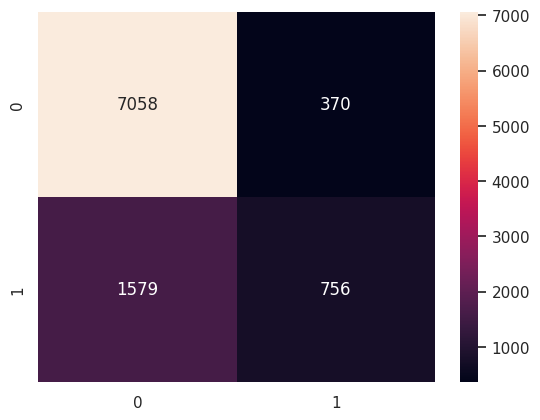

In [77]:
# Naive Bayes Model
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

print('ACCURACY_SCORE \n\n', accuracy_score(y_test, y_pred), '\n')
print('CLASSIFICATION_REPORT \n\n', classification_report(y_test, y_pred), '\n')
print(' CONFUSION MATRIX ')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

**** ACCURACY_SCORE **** 

 0.859674280446584 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7428
           1       0.74      0.63      0.68      2335

    accuracy                           0.86      9763
   macro avg       0.82      0.78      0.80      9763
weighted avg       0.85      0.86      0.86      9763
 

**** CONFUSION MATRIX ****


<Axes: >

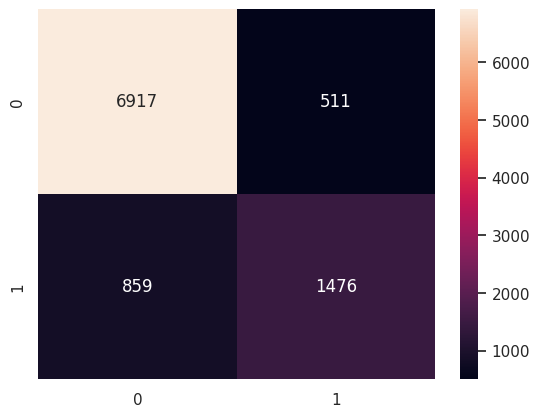

In [78]:
#Random Forest Classifier Model
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')